In [1]:
%%capture
# Setup: Installing packages we will need in this notebook
%pip install pyfmreader
%pip install matplotlib

In [2]:
# 1. Import pyafmreader loadfile and matplotlib
from pyfmreader import loadfile
import matplotlib.pyplot as plt

# Get documentation about loadfile function
help(loadfile)

Help on function loadfile in module pyfmreader.pyfmreader:

loadfile(filepath)
    Load AFM file. 
    
    Supported formats:
        - JPK --> .jpk-force, .jpk-force-map, .jpk-qi-data
        - JPK Thermal --> .tnd
        - NANOSCOPE --> .spm, .pfc, .00X
        - UFF --> .uff
    
            Parameters:
                    filepath (str): Path to the file.
            
            Returns:
                    If JPK, NANOSCOPE OR UFF:
                        UFF (uff.UFF): Universal File Format object containing loaded data.
                    If JPK Thermal:
                        Amplitude (m^2/V) (np.array),
                        Frequencies (Hz) (np.array),
                        Fit-Data (m^2/V) (np.array),
                        Parameters (dict)



In [6]:
# 2. Load one of the test files
JPK_THERMAL_PATH = '../tests/testfiles/PFQNM-H2O-thermal-noise-data_vDeflection_2022.01.12-11.37.51.tnd'

Amplitude, Amplitude_Scaled, Frequencies, FitData, Parameters = loadfile(JPK_THERMAL_PATH)

print(type(Amplitude))
print(type(Amplitude_Scaled))
print(type(Frequencies))
print(type(FitData))
print(type(Parameters))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'dict'>


In [7]:
# 3. Visualize metadata
for key, val in Parameters.items():
    print(f'{key}: {val}')

sensitivity: 1.10399e-08
spring constant: 0.0458785
parameter.f: 24250.0
parameter.Q: 2.050
parameter.A: 9.212e-05
parameter.noise: 4.501×10⁻¹⁰
parameter.Corrected K: 5.423×10⁻¹⁸
parameter.Corrected Vertical K: 5.592×10⁻¹⁸
settings.method: Contact-free
settings.temperature: 25.0
settings.environment: Water
settings.environment density: 997000.0
settings.environment viscosity: 0.00089
cantilever.name: PFQNM-LC-A
cantilever.width: 4.5e-06
cantilever.length: 5.4e-05
cantilever.angle: 10° + 0.0 °
cantilever.correction factor: 0.9000
Channels: 'Frequency' 'Vertical Deflection' 'average' 'fit-data' 
Units: 'Hz' 'V²/Hz' 'V²/Hz' 'V²/Hz'


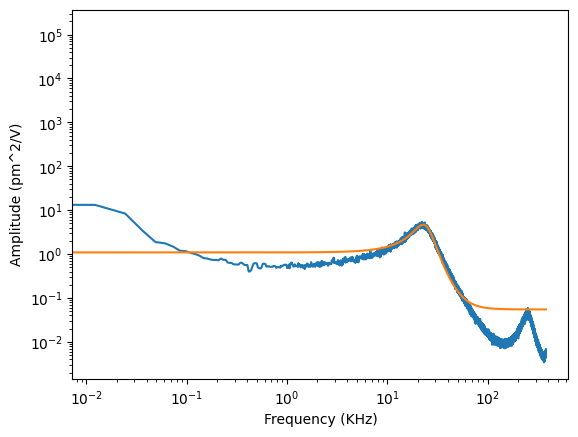

In [9]:
# 4. Plot file data
plt.plot(Frequencies * 1e-3, Amplitude_Scaled * (1e12 ** 2), label='Raw data')
plt.plot(Frequencies * 1e-3, FitData * (1e12 ** 2), label='JPK Fit')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (KHz)')
plt.ylabel('Amplitude (pm^2/V)')
plt.show()